# Testing Model
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Besti-Corps/MachineLearning-BestiApp/blob/main/Model/testing_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Besti-Corps/MachineLearning-BestiApp/blob/main/Model/testing_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Import Library

In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from google.colab import files
from keras.preprocessing import image

## Download Keras Model

In [2]:
url = f"https://raw.githubusercontent.com/Besti-Corps/MachineLearning-BestiApp/main/Model/KERAS_MODEL/checkpoint_model.h5"
!wget --no-cache --backups=1 {url}

--2022-05-16 08:40:05--  https://raw.githubusercontent.com/Besti-Corps/MachineLearning-BestiApp/main/Model/KERAS_MODEL/checkpoint_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17297992 (16M) [application/octet-stream]
Saving to: ‘checkpoint_model.h5’

checkpoint_model.h5 100%[===================>]  16.50M  --.-KB/s    in 0.06s   

2022-05-16 08:40:05 (263 MB/s) - ‘checkpoint_model.h5’ saved [17297992/17297992]



## Load Keras Model

In [3]:
load_model = tf.keras.models.load_model('checkpoint_model.h5')

### Set Parameters

In [4]:
label_names = [
    'battery', 'biological', 'brown-glass', 'cardboard', 
    'clothes', 'green-glass', 'metal', 'paper', 'plastic', 
    'shoes', 'trash', 'white-glass'
    ]
IMG_SIZE = (224, 224)

## Testing by Upload Image

Class Informations
1. battery 
2. biological 
3. brown-glass, 
4. cardboard 
5. clothes 
6. green-glass 
7. metal 
8. paper 
9. plastic 
10. shoes 
11. trash 
12. white-glass

Saving Masker_Kesehatan____3M_Aura_Health_Care_Particulate_Respirat-.jpeg to Masker_Kesehatan____3M_Aura_Health_Care_Particulate_Respirat- (1).jpeg

Filename: Masker_Kesehatan____3M_Aura_Health_Care_Particulate_Respirat-.jpeg
Predict Label: trash
Predict Percentage: 97.43
List All Predict:
[[3.5617081e-08 2.3843113e-06 1.6168260e-05 1.6706667e-03 4.1221008e-03
  2.2686474e-06 2.9117498e-07 1.5249599e-02 5.8610607e-05 4.6047559e-03
  9.7426695e-01 6.2043878e-06]]


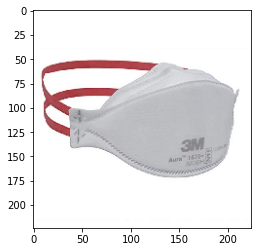

In [7]:
uploaded = files.upload()

for filename in uploaded.keys():
 
  # predicting images
  path = filename
  img = image.load_img(path, target_size= IMG_SIZE + (3,))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = load_model.predict(images, batch_size=10)
  outclass = np.argmax(classes)
  
  print()
  print(f'Filename: {filename}')
  plt.imshow(img)

  for i, label in enumerate(label_names):
    if outclass == i:
      predic = classes[0][i]
      print(f'Predict Label: {label}')
      print(f'Predict Percentage: {predic*100:.02f}')
      print(f'List All Predict:\n{classes}')